In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

WIDTH = 92
HEIGHT = 112

In [2]:
def load_face(filename='faces.csv', test_ratio=0.2):

    # read the face list 
    file = open(filename, 'r')
    lines = file.readlines()

    # 2. read all images
    N = len(lines)
    faces = np.empty((N, WIDTH*HEIGHT), dtype=np.uint8 )
    labels = np.empty(N, dtype = np.int32)
    for i, line in enumerate(lines):
        filename, label = line.strip().split(';')
        labels[i] = int(label)
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        faces[i, :] = img.flatten()
  
    print(f"{N} images for labels {list(set(labels)).sort()}")
  
    # 3. separate into training and test/validation dataset 
    
    # shuffling and seperate train and test data
    indices = list(range(N))
    random.seed(1) # same random sequences, so the same result
    random.shuffle(indices)
    shuffle_faces = faces[indices]
    shuffle_labels = labels[indices]

    test_size = int(test_ratio*N)

    test_faces = shuffle_faces[:test_size]
    test_labels = shuffle_labels[:test_size]

    train_faces = shuffle_faces[test_size:]
    train_labels = shuffle_labels[test_size:]
 
    return train_faces, train_labels, test_faces, test_labels

In [3]:
 # 1. load dataset 
train_faces, train_labels, test_faces, test_labels = load_face()
print('train_faces.shape=',  train_faces.shape)
print('train_labels.shape=', train_labels.shape)
print('test_faces.shape=',   test_faces.shape)
print('test_labels.shape=',  test_labels.shape)

400 images for labels None
train_faces.shape= (320, 10304)
train_labels.shape= (320,)
test_faces.shape= (80, 10304)
test_labels.shape= (80,)


In [4]:
# 2. create Face recognizer     
recognizer = cv2.face.EigenFaceRecognizer_create()
##recognizer = cv2.face.FisherFaceRecognizer_create()



In [5]:

# 3. train with train dataset 
print("training....")
recognizer.train(train_faces.reshape(-1, HEIGHT, WIDTH), train_labels)


training....


eigenFace.shape= (320, 10304)


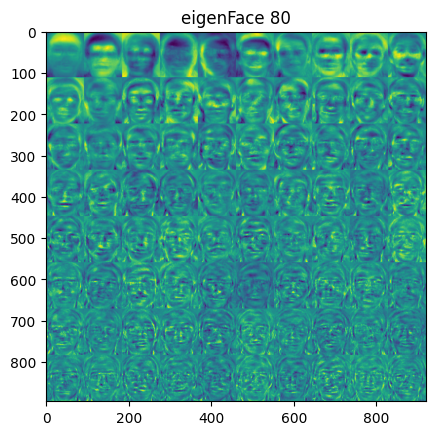

In [6]:
# 3.2 train result: display eigen Face
eigenFace = recognizer.getEigenVectors()
eigenFace = eigenFace.T
print('eigenFace.shape=',  eigenFace.shape)
dst = np.zeros((8*HEIGHT, 10*WIDTH), dtype=np.uint8)
##for i in range(39): # FisherFaceRecognizer
for i in range(80):
    x = i%10
    y = i//10
    x1 = x*WIDTH
    y1 = y*HEIGHT
    x2 = x1+WIDTH
    y2 = y1+HEIGHT  
    img = eigenFace[i].reshape(HEIGHT, WIDTH)
    dst[y1:y2, x1:x2] = cv2.normalize(img,None,0,255,cv2.NORM_MINMAX)

#cv2.imshow('eigenFace 80', dst)
plt.imshow(dst)
plt.title('eigenFace 80')
plt.show()


In [7]:
# 4. predict test_faces using recognizer
print("predicting....")
correct_count = 0
for i, face in enumerate(test_faces): 
    predict_label, confidence = recognizer.predict(face)
    if test_labels[i] == predict_label:
        correct_count+= 1
    print(f'{test_labels[i] == predict_label}, gt={test_labels[i]}, pred:{predict_label},confidence={confidence:.2f}')

accuracy = correct_count / float(len(test_faces))
print(f'accuracy={accuracy:.4f}')

predicting....
True, gt=20, pred:20,confidence=2015.84
True, gt=15, pred:15,confidence=1121.19
True, gt=26, pred:26,confidence=1275.20
True, gt=33, pred:33,confidence=3076.70
True, gt=38, pred:38,confidence=2466.74
True, gt=21, pred:21,confidence=2678.42
True, gt=32, pred:32,confidence=2515.56
True, gt=34, pred:34,confidence=2074.36
True, gt=0, pred:0,confidence=3474.36
True, gt=28, pred:28,confidence=2123.33
True, gt=5, pred:5,confidence=2562.93
True, gt=4, pred:4,confidence=1333.21
True, gt=3, pred:3,confidence=2273.28
True, gt=28, pred:28,confidence=2909.42
True, gt=22, pred:22,confidence=1592.03
True, gt=19, pred:19,confidence=2950.23
True, gt=23, pred:23,confidence=2353.20
True, gt=30, pred:30,confidence=2602.71
True, gt=10, pred:10,confidence=2570.16
True, gt=21, pred:21,confidence=1975.48
True, gt=6, pred:6,confidence=1753.89
True, gt=32, pred:32,confidence=2039.36
True, gt=38, pred:38,confidence=1790.33
True, gt=2, pred:2,confidence=2609.21
True, gt=9, pred:9,confidence=1749.13

In [18]:
f34 = test_faces[34].reshape((102,101))
f35 = test_faces[35].reshape((102,101))




ValueError: cannot reshape array of size 10304 into shape (102,101)

In [20]:
102*102

10404